Data Analysis on Zomato

Notebook still being updated with final comments and code formatting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [3]:
df = pd.read_csv(r'C:\Users\jassi\archive\zomato.csv')

In [4]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Column Handling

In [6]:
df.drop(['url','address','phone','reviews_list','votes','phone','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   location                     51696 non-null  object
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: object(10)
memory usage: 3.9+ MB


In [8]:
df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'listed_type','listed_in(city)':'listed_city','rate':'rating'},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rating        43942 non-null  object
 4   location      51696 non-null  object
 5   rest_type     51490 non-null  object
 6   cuisines      51672 non-null  object
 7   cost          51371 non-null  object
 8   listed_type   51717 non-null  object
 9   listed_city   51717 non-null  object
dtypes: object(10)
memory usage: 3.9+ MB


Handle Duplicate Values

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [11]:
duplicates = df[df.duplicated()]

In [12]:
duplicates

,name,online_order,book_table,rating,location,rest_type,cuisines,cost,listed_type,listed_city
596,My Tea House,Yes,Yes,NEW,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.6/5,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out,Bannerghatta Road
3763,The Fisherman's Wharf,Yes,Yes,4.4/5,Sarjapur Road,"Casual Dining, Bar","Seafood, Goan, North Indian, Continental, Asian","1,400",Buffet,Bellandur
4339,Biryani Treat,No,No,NaN,Bellandur,Quick Bites,Biryani,400,Delivery,Bellandur
4949,OPUS Club,No,Yes,4.4/5,Sarjapur Road,Pub,"Continental, Italian, North Indian, Mexican","1,900",Drinks & nightlife,Bellandur
...,...,...,...,...,...,...,...,...,...,...
49193,Sri Ganesh Juice Junction,Yes,No,3.5 /5,Bellandur,Beverage Shop,"Juices, Fast Food",200,Delivery,Sarjapur Road
49432,Biryani Treat,No,No,NaN,Bellandur,Quick Bites,Biryani,400,Delivery,Sarjapur Road
50379,House Of Candy,Yes,No,NaN,Whitefield,Confectionery,Desserts,200,Delivery,Whitefield
50405,House Of Candy,Yes,No,NaN,Whitefield,Confectionery,Desserts,200,Delivery,Whitefield


In [13]:
df.duplicated().any()

True

In [14]:
len(df) - len(df.drop_duplicates())

114

In [15]:
df.drop_duplicates()

,name,online_order,book_table,rating,location,rest_type,cuisines,cost,listed_type,listed_city
0,Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
len(df)

51603

Null Value Handling

In [18]:
df.isnull()

,name,online_order,book_table,rating,location,rest_type,cuisines,cost,listed_type,listed_city
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False
51713,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

name               0
online_order       0
book_table         0
rating          7755
location          21
rest_type        227
cuisines          45
cost             344
listed_type        0
listed_city        0
dtype: int64

In [20]:
df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
def handlerate(rate):
    if rate == 'NEW' or rate== '-':
        return np.nan
    else:
        rate=str(rate).split('/')
        rate=rate[0]
        return float(rate)

In [22]:
df['rating']=df['rating'].apply(handlerate)

In [23]:
df['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [24]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [25]:
df['location'].fillna(method='bfill',inplace=True)

In [26]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rating          10019
location            0
rest_type         227
cuisines           45
cost              344
listed_type         0
listed_city         0
dtype: int64

In [27]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [28]:
df['rest_type'].nunique()

93

In [29]:
df['rest_type'].fillna(value='Others',inplace=True)

In [30]:
df['rest_type'].isnull().sum()

0

In [31]:
df['cuisines'].fillna(value='Others',inplace=True)

In [32]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rating          10019
location            0
rest_type           0
cuisines            0
cost              344
listed_type         0
listed_city         0
dtype: int64

In [33]:
df['cost'].fillna(method='ffill',inplace=True)

In [34]:
df.dropna(how='any',inplace=True)

In [35]:
df.isna().sum()

name            0
online_order    0
book_table      0
rating          0
location        0
rest_type       0
cuisines        0
cost            0
listed_type     0
listed_city     0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df['location'].value_counts(ascending=False)

BTM                      3918
Koramangala 5th Block    2317
HSR                      2018
Indiranagar              1841
JP Nagar                 1717
                         ... 
Yelahanka                   5
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [38]:
location = df['location'].value_counts(ascending=False)

In [39]:
loc_less_than_500 = location[location<500]

In [40]:
loc_less_than_500

Lavelle Road            482
Banaswadi               475
Cunningham Road         474
Rajajinagar             461
Domlur                  409
                       ... 
Yelahanka                 5
West Bangalore            3
Rajarajeshwari Nagar      2
Nagarbhavi                1
Peenya                    1
Name: location, Length: 62, dtype: int64

In [41]:
def handle_loc(x):
    if x in loc_less_than_500:
        return 'Others'
    else:
        return x

In [42]:
df['location']=df['location'].apply(handle_loc)

In [43]:
df['location'].value_counts(ascending=False)

Others                   8082
BTM                      3918
Koramangala 5th Block    2317
HSR                      2018
Indiranagar              1841
JP Nagar                 1717
Jayanagar                1643
Whitefield               1582
Marathahalli             1440
Bannerghatta Road        1233
Koramangala 6th Block    1075
Koramangala 7th Block    1058
Brigade Road             1048
Bellandur                1011
Sarjapur Road             864
Koramangala 1st Block     851
Ulsoor                    843
Koramangala 4th Block     841
Electronic City           838
MG Road                   810
Banashankari              744
Kalyan Nagar              698
Malleshwaram              642
Richmond Road             611
Residency Road            602
Basavanagudi              595
Frazer Town               566
Brookefield               545
Church Street             543
New BEL Road              508
Kammanahalli              500
Name: location, dtype: int64

In [44]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Others', 'Jayanagar', 'JP Nagar',
       'Bannerghatta Road', 'BTM', 'Electronic City', 'Sarjapur Road',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Marathahalli', 'Whitefield',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Kammanahalli', 'Koramangala 6th Block', 'Brookefield',
       'Koramangala 4th Block', 'Kalyan Nagar', 'Malleshwaram',
       'New BEL Road'], dtype=object)

In [45]:
rest_type=df['rest_type'].value_counts(ascending=False)

In [46]:
rest_type_less_than_500 = rest_type[rest_type<500]

In [47]:
def handle_rest_type(x):
    if x in rest_type_less_than_500:
        return 'Others'
    else:
        return x

In [48]:
rest_type=rest_type.apply(handle_rest_type)

In [49]:
df.head(3)

,name,online_order,book_table,rating,location,rest_type,cuisines,cost,listed_type,listed_city
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


In [50]:
cuisines = df['cuisines'].value_counts(ascending=False)

In [51]:
cuisines

North Indian                                             2157
North Indian, Chinese                                    1976
South Indian                                             1233
Cafe                                                      642
Bakery, Desserts                                          615
                                                         ... 
North Indian, Mughlai, Chinese, Seafood, South Indian       1
Chinese, Thai, Seafood, Malaysian                           1
North Indian, Chinese, Arabian, Kebab                       1
Turkish, Fast Food, Biryani, Chinese                        1
North Indian, Chinese, Arabian, Momos                       1
Name: cuisines, Length: 2384, dtype: int64

In [52]:
cuisine_less_than_500 = cuisines[cuisines<500]

In [53]:
def handle_rest_type(x):
    if x in cuisine_less_than_500:
        return 'Others'
    else:
        return x

In [54]:
df

,name,online_order,book_table,rating,location,rest_type,cuisines,cost,listed_type,listed_city
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,Others,Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [55]:
listed_type=df['listed_type'].value_counts(ascending=False)

In [56]:
listed_type

Delivery              20596
Dine-out              14191
Desserts               2732
Cafes                  1526
Drinks & nightlife     1048
Buffet                  853
Pubs and bars           638
Name: listed_type, dtype: int64

In [57]:
datatoexcel = pd.ExcelWriter('cleaned_zomato.xlsx')

In [58]:
df.to_excel(datatoexcel)

In [59]:
datatoexcel.save()

C:\Users\jassi\AppData\Local\Temp\ipykernel_19968\1964257727.py:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  datatoexcel.save()


# Data Analysis

In [60]:
#total restaurants available 
print("Total number of Restaurants available: ",df['name'].count())

Total number of Restaurants available:  41584


In [61]:
#Most popular restaurants 
popular=df.groupby(['name']).size()

In [62]:
popular

name
#FeelTheROLL                                     2
#L-81 Cafe                                       9
#refuel                                          3
1000 B.C                                         6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C             3
                                                ..
i-Bar - The Park Bangalore                      11
iFruit Live Ice Creams                           4
iSpice Resto Cafe                                7
nu.tree                                          7
re:cess - Hilton Bangalore Embassy GolfLinks     3
Length: 6649, dtype: int64

In [63]:
#Most Popular Restaurant
df['name'].describe()

count               41584
unique               6649
top       Cafe Coffee Day
freq                   86
Name: name, dtype: object

In [64]:
#How many restaurants have online ordering 
df['online_order'].describe()

count     41584
unique        2
top         Yes
freq      27144
Name: online_order, dtype: object

In [65]:
#Number of online orders that allow table booking
df.loc[((df['online_order']=='Yes') & (df['book_table']=='Yes'))]

,name,online_order,book_table,rating,location,rest_type,cuisines,cost,listed_type,listed_city
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
11,Cafe Shuffle,Yes,Yes,4.2,Banashankari,Cafe,"Cafe, Italian, Continental",600,Cafes,Banashankari
12,The Coffee Shack,Yes,Yes,4.2,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500,Cafes,Banashankari
44,Onesta,Yes,Yes,4.6,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51697,Shizusan Shophouse & Bar,Yes,Yes,4.4,Whitefield,"Casual Dining, Bar","Asian, Japanese, Vietnamese, Korean, Chinese, ...","1,800",Pubs and bars,Whitefield
51699,Harry's Bar + Cafe,Yes,Yes,4.1,Whitefield,Pub,"Asian, American, Mexican","1,200",Pubs and bars,Whitefield
51701,The Beer Cafe,Yes,Yes,4.1,Whitefield,Pub,"Finger Food, North Indian, Chinese, Italian","1,400",Pubs and bars,Whitefield
51703,Oliver's Pub & Diner,Yes,Yes,3.9,Whitefield,"Pub, Casual Dining","Finger Food, American, Continental, Burger, Pizza","1,500",Pubs and bars,Whitefield


In [66]:
#Number of restaurants that do not allow online order but allow table booking
df.loc[((df['online_order']=='No') & (df['book_table']=='Yes'))]

,name,online_order,book_table,rating,location,rest_type,cuisines,cost,listed_type,listed_city
63,1947,No,Yes,4.0,Banashankari,Casual Dining,"North Indian, Chinese",850,Delivery,Banashankari
561,Jcubez,No,Yes,3.8,Banashankari,Lounge,Finger Food,"1,300",Dine-out,Banashankari
572,1947,No,Yes,4.0,Banashankari,Casual Dining,"North Indian, Chinese",850,Dine-out,Banashankari
855,Jcubez,No,Yes,3.8,Banashankari,Lounge,Finger Food,"1,300",Drinks & nightlife,Banashankari
868,Barbeque Nation,No,Yes,4.7,JP Nagar,Casual Dining,"North Indian, European, Mediterranean, BBQ, Kebab","1,600",Buffet,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...
51691,Uno Chicago Bar & Grill,No,Yes,4.2,Whitefield,"Bar, Casual Dining","American, Italian","1,800",Pubs and bars,Whitefield
51696,The Irish House,No,Yes,4.3,Whitefield,"Casual Dining, Pub","European, American","1,700",Pubs and bars,Whitefield
51700,BAR BAR,No,Yes,4.1,Whitefield,"Bar, Casual Dining","Continental, North Indian, Italian","1,500",Pubs and bars,Whitefield
51704,Smaaash,No,Yes,4.0,Whitefield,"Casual Dining, Pub","North Indian, Pizza, Chinese","1,500",Pubs and bars,Whitefield


# Data Visualization

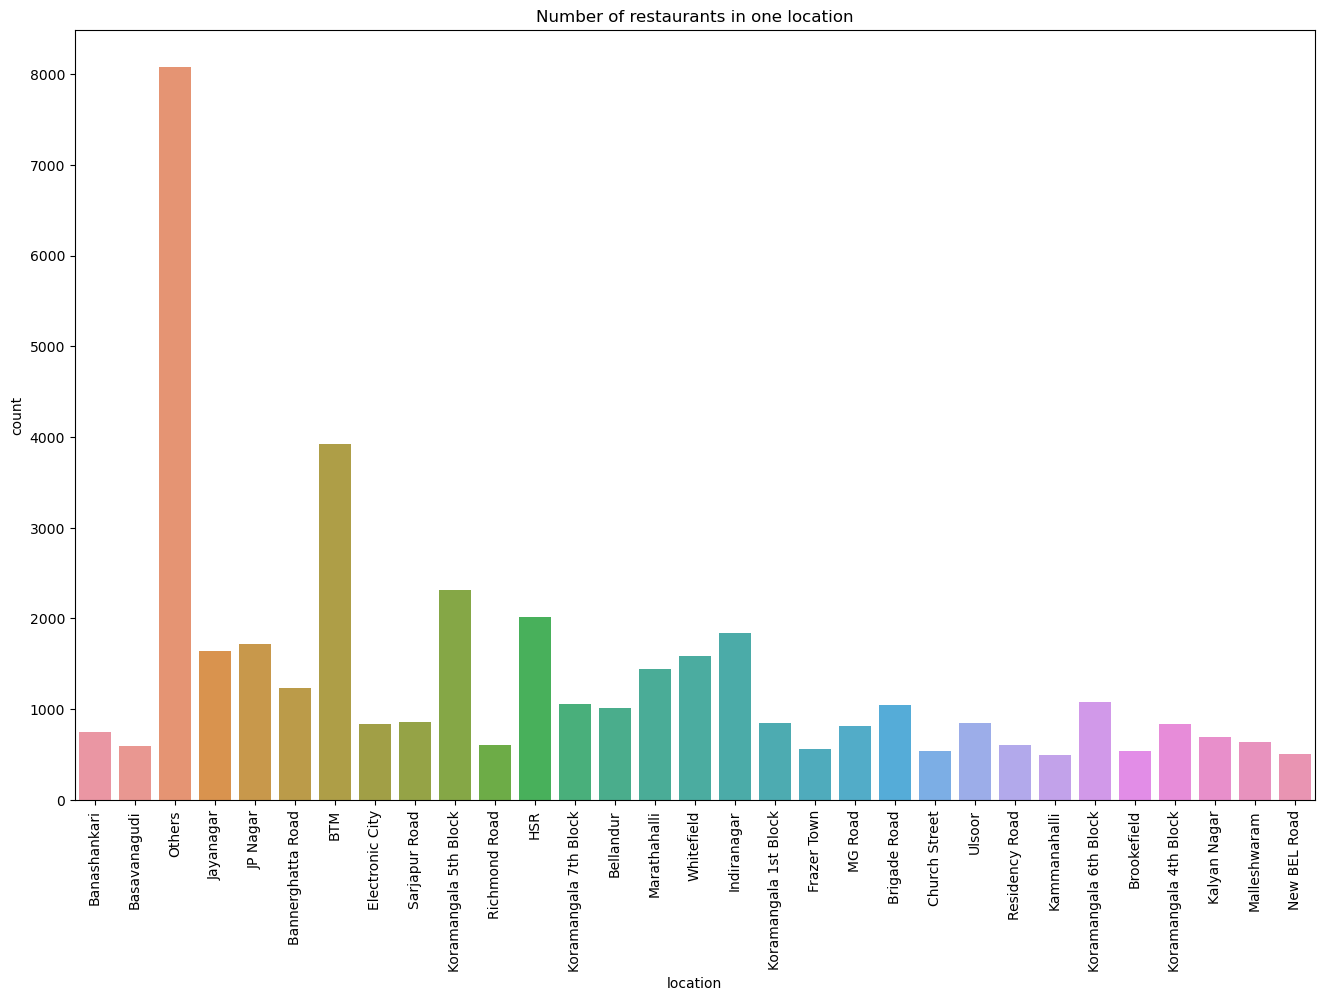

In [67]:
plt.figure(figsize=(16,10))
sns.countplot(x=df['location'])
plt.title('Number of restaurants in one location')
plt.xticks(rotation=90);


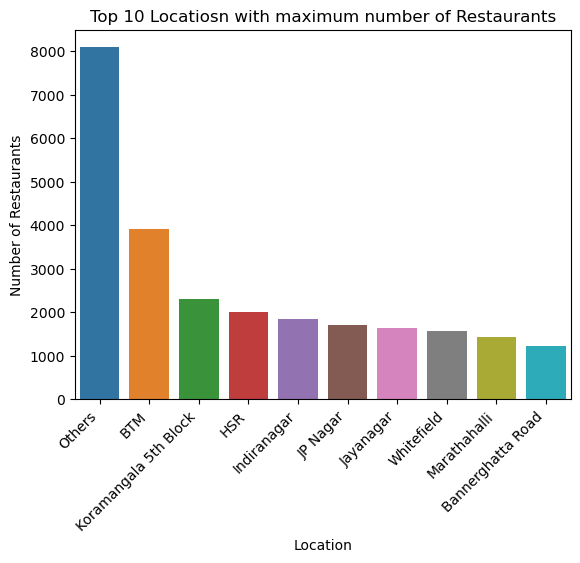

In [70]:
top_location = df.location.value_counts(ascending=False).head(10)
sns.barplot(x=top_location.index,y=top_location.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Locatiosn with maximum number of Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants');

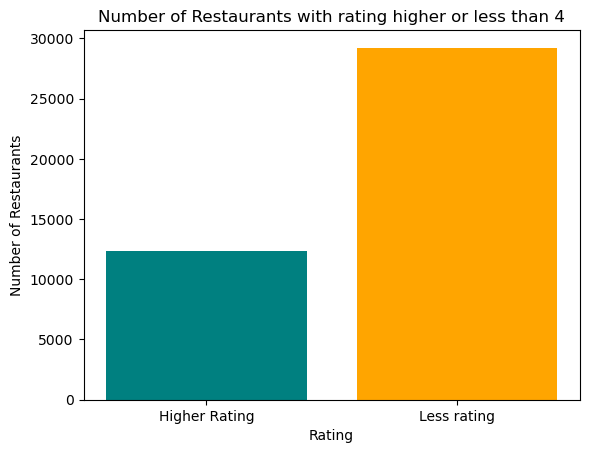

In [72]:
high_rating= (df['rating'] >= 4).sum()
less_rating= (df['rating'] < 4).sum()

# Create bar chart
plt.bar(['Higher Rating', 'Less rating'], [high_rating, less_rating], color=['teal','orange'])
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants with rating higher or less than 4')
plt.show()

C:\Users\jassi\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
C:\Users\jassi\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
C:\Users\jassi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jassi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


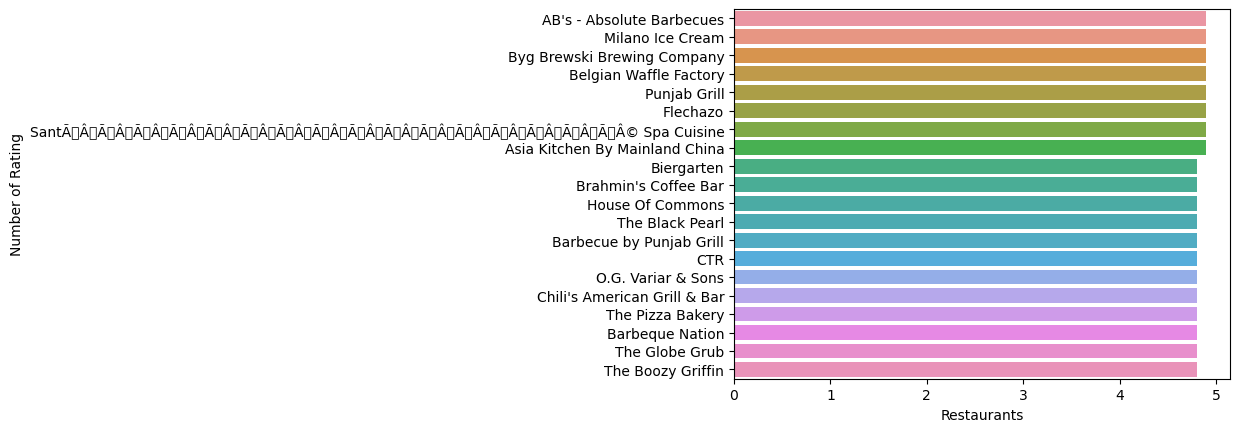

In [74]:
top_rating = df.groupby('name')['rating'].max().sort_values(ascending=False).head(20)
sns.barplot(y=top_rating.index, x=top_rating.values)
plt.xlabel('Restaurants with maximum Rating')
plt.xlabel('Restaurants')
plt.ylabel('Number of Rating');

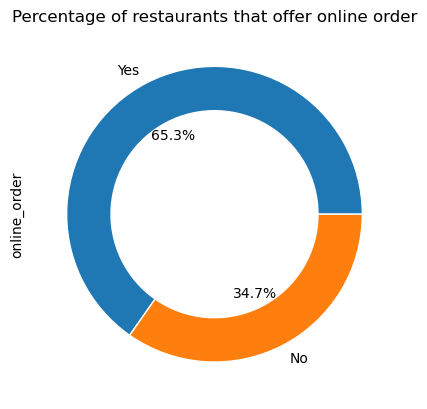

In [78]:
df['online_order'].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of restaurants that offer online order');

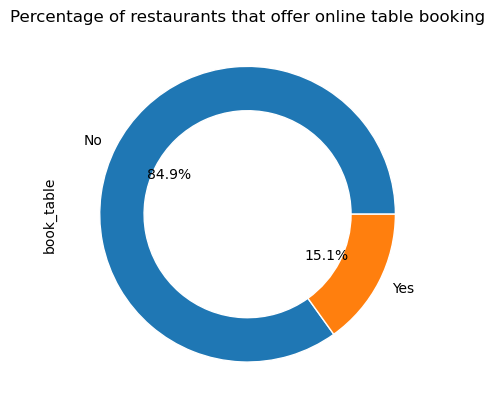

In [79]:
df['book_table'].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of restaurants that offer online table booking');

Text(0.5, 1.0, 'Rating with table booking')

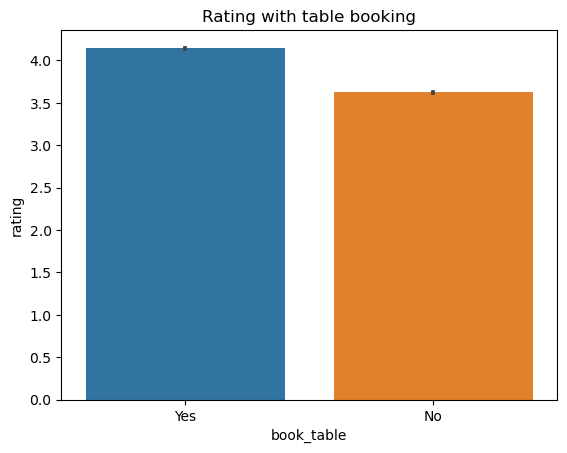

In [82]:
sns.barplot(x=df['book_table'], y=df['rating'])
plt.title('Rating with table booking')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41584 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41584 non-null  object 
 1   online_order  41584 non-null  object 
 2   book_table    41584 non-null  object 
 3   rating        41584 non-null  float64
 4   location      41584 non-null  object 
 5   rest_type     41584 non-null  object 
 6   cuisines      41584 non-null  object 
 7   cost          41584 non-null  object 
 8   listed_type   41584 non-null  object 
 9   listed_city   41584 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.5+ MB


In [91]:
df['cost']=df['cost'].str.replace(",","").astype('int64')

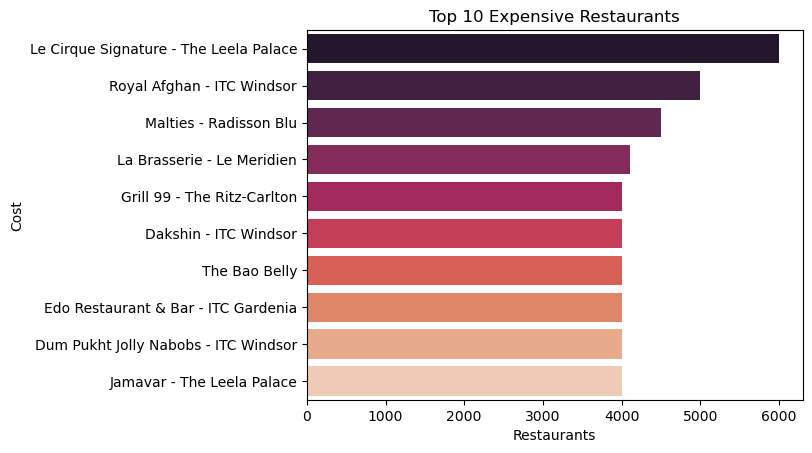

In [92]:
top_exp=df.groupby('name')['cost'].max().sort_values(ascending=False).head(10)
sns.barplot(y=top_exp.index, x=top_exp.values,palette="rocket")
plt.title('Top 10 Expensive Restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Cost');

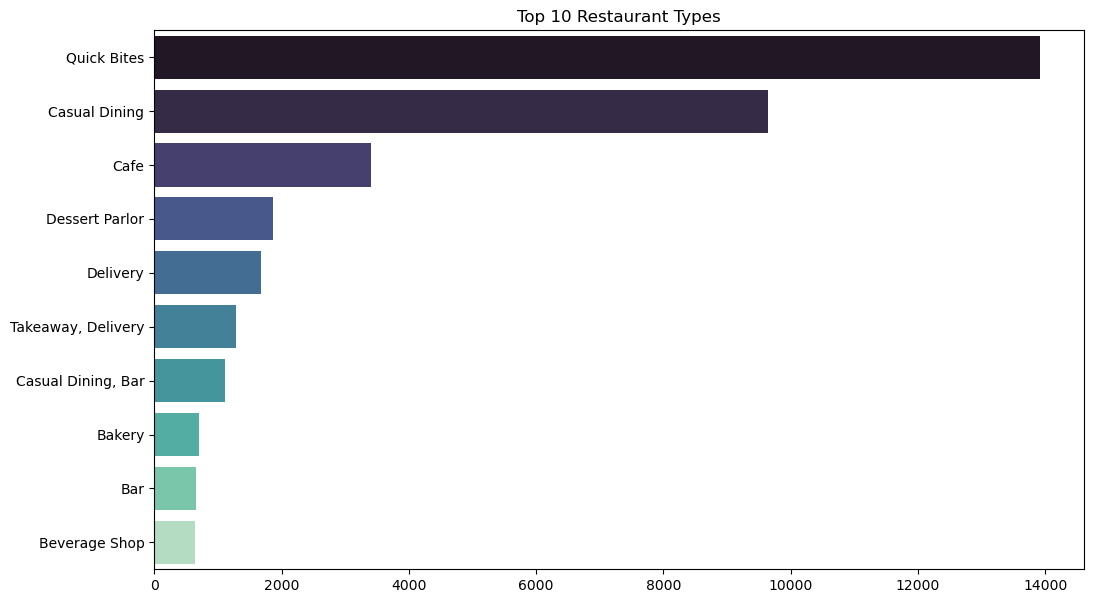

In [93]:
top_types=df.rest_type.value_counts(ascending=False).head(10)
plt.figure(figsize=(12,7))
sns.barplot(x=top_types.values, y=top_types.index, palette='mako')
plt.title('Top 10 Restaurant Types');

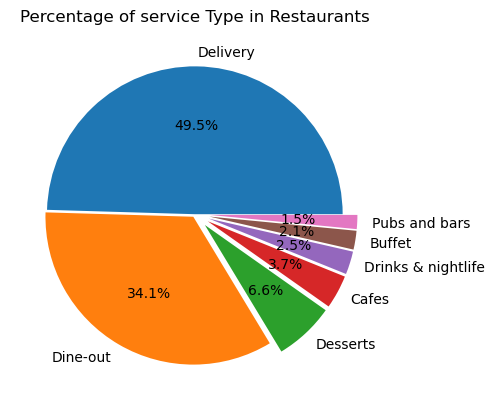

In [96]:
restaurant_count=df.listed_type.value_counts()
plt.pie(restaurant_count, labels=restaurant_count.index, explode=[0,0.02,0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%')

#Add title
plt.title('Percentage of service Type in Restaurants')

plt.show()

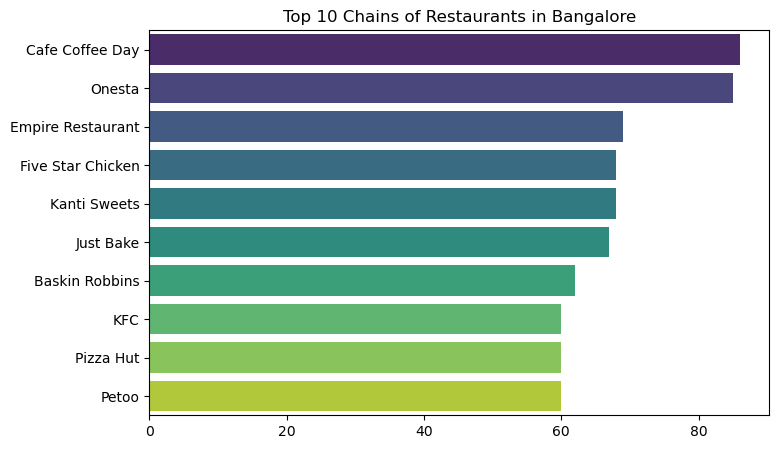

In [100]:
top_rest=df.name.value_counts(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_rest.values, y=top_rest.index,palette="viridis")
plt.title('Top 10 Chains of Restaurants in Bangalore');

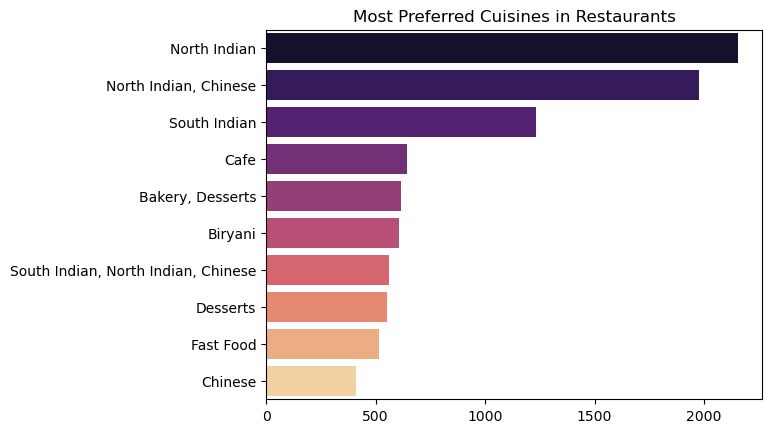

In [102]:
cuisines=df["cuisines"].value_counts(ascending=False).head(10)
sns.barplot(y=cuisines.index, x=cuisines.values,palette="magma")
plt.title("Most Preferred Cuisines in Restaurants");

In [103]:
df.to_csv('Zomato_w_visual.csv')